# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [141]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hopeforrester/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [142]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

In [143]:
# Read your api key environment variable
news_api_key = "6a058e1ff7a84f71a1267bc5089bb028"

In [144]:
print(type(news_api_key))

<class 'str'>


In [145]:
newsapi = NewsApiClient(api_key=news_api_key)

## Fetch Bitcoin and Ethereum articles
* 1st way: newsapi.geteverything
* 2nd way: btc_response = requests.get(btc_url).json()

Utilized 1st way as second way was returing too few articles.

In [146]:
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about BTC: {btc_headlines['totalResults']}")

# Show sample article
btc_headlines["articles"][2]

Total articles about BTC: 6600


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Steve Dent',
 'title': 'Mt. Gox exchange users may finally get to recover some of their lost Bitcoin',
 'description': 'When Mt. Gox went bankrupt in 2014, it was the world’s largest Bitcoin exchange, holding 850,000 Bitcoins from thousands of users. Now, creditors might finally be able to get a portion of those riches back. One of Mt. Gox’s largest creditors, CoinLab, said an…',
 'url': 'https://www.engadget.com/mt-gox-bitcoin-users-recovery-153025831.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-images%2F2019-06%2Fcedcace0-91a9-11e9-bffe-eca270dadf9c&client=amp-blogside-v2&signature=b2965154f62f66ab9ffbed4ae4ed98155a7bb786',
 'publishedAt': '2021-01-18T21:30:25Z',
 'content': 'When Mt. Gox went bankrupt in 2014, it was the world’s largest Bitcoin exchange, holding 850,000 Bitcoins from thousands of users. Now, c

In [147]:
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about ETH: {eth_headlines['totalResults']}")

# Show sample article
eth_headlines["articles"][2]

Total articles about ETH: 1440


{'source': {'id': None, 'name': 'BNNBloomberg.ca'},
 'author': 'Bloomberg News',
 'title': 'Bitcoin rally comes to a halt as prices fall most since March - BNN',
 'description': '<ol><li>Bitcoin rally comes to a halt as prices fall most since March\xa0\xa0BNN\r\n</li><li>Bitcoin, Ethereum Outlook: Cryptos Go Parabolic, is a Correction Due?\xa0\xa0DailyFX\r\n</li><li>Bitcoin slumps, slamming brakes on New Year rally\xa0\xa0The Globe and Mail\r\n</li><li>Bitco…',
 'url': 'http://www.bnnbloomberg.ca/bitcoin-mania-reaches-new-heights-as-prices-go-parabolic-1.1543469',
 'urlToImage': 'http://www.bnnbloomberg.ca/polopoly_fs/1.1468795!/fileimage/httpImage/image.jpg_gen/derivatives/landscape_620/bitcoin.jpg',
 'publishedAt': '2021-01-04T13:58:21Z',
 'content': 'Bitcoin fizzled in Monday trading as the famously volatile cryptocurrency pulled back after a spectacular new-year rally.\r\nPrices fell as much as 17 per cent in the biggest drop since March before re… [+2174 chars]'}

In [148]:
# Create a newsapi client & fetch Bitcoin News Articles
import requests

btc_url = ('http://newsapi.org/v2/top-headlines?'
       'q=Bitcoin&'
       'apiKey=6a058e1ff7a84f71a1267bc5089bb028')

btc_response = requests.get(btc_url).json()

#btc_response

In [149]:
# Fetch the Ethereum news articles
# Create a newsapi client
import requests

eth_url = ('http://newsapi.org/v2/top-headlines?'
        'q=Ethereum&'
        'apiKey=6a058e1ff7a84f71a1267bc5089bb028')

eth_response = requests.get(eth_url).json()

#eth_response

In [150]:
# Create the Bitcoin sentiment scores DataFrame


bitcoin_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"] #-1 to +1
        #below scores range from 0 to 1
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text, #article content
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2020-12-29,The government of India is considering an 18% ...,-0.2924,0.000,0.059,0.941
1,2021-01-03,Just weeks after it shattered its yearslong as...,0.3612,0.171,0.080,0.749
2,2021-01-18,"When Mt. Gox went bankrupt in 2014, it was the...",-0.5574,0.000,0.096,0.904
3,2021-01-14,Ban reflects Twitters failure to promote healt...,-0.3818,0.135,0.176,0.689
4,2021-01-02,New York (CNN Business)Bitcoin has been flirti...,0.5719,0.132,0.000,0.868


In [151]:
nltk.sentiment.sentiment_analyzer.SentimentAnalyzer(btc_response)
#nltk.add_feat_extractor(btc_response)

In [152]:
# Create the Bitcoin sentiment scores DataFrame

eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"] #-1 to +1
        #below scores range from 0 to 1
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text, #article content
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()


,date,text,compound,positive,negative,neutral
0,2021-01-05T13:15:00Z,Cryptocurrencies stole headlines on the first ...,0.3412,0.074,0.00,0.926
1,2021-01-04T17:08:27Z,Ethereum creator Vitalik Buterin.\r\n14 with 1...,0.5256,0.099,0.00,0.901
2,2021-01-04T13:58:21Z,Bitcoin fizzled in Monday trading as the famou...,-0.2732,0.000,0.06,0.940
3,2021-01-08T02:48:37Z,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.00,1.000
4,2021-01-08T02:51:00Z,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.00,1.000


In [153]:
# Describe the Bitcoin Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,86.000000,86.000000,86.000000,86.000000
mean,0.161636,0.059872,0.020721,0.919419
std,0.347829,0.071674,0.041619,0.084913
min,-0.700300,0.000000,0.000000,0.688000
25%,0.000000,0.000000,0.000000,0.865250
50%,0.000000,0.038000,0.000000,0.935500
75%,0.440400,0.105500,0.028500,1.000000
max,0.839900,0.263000,0.189000,1.000000


In [154]:
bitcoin_df.describe()

,compound,positive,negative,neutral
count,94.000000,94.000000,94.000000,94.000000
mean,0.082863,0.041330,0.019543,0.939138
std,0.317167,0.062456,0.039270,0.076196
min,-0.612400,0.000000,0.000000,0.675000
25%,0.000000,0.000000,0.000000,0.900250
50%,0.000000,0.000000,0.000000,0.958000
75%,0.323300,0.072000,0.000000,1.000000
max,0.817300,0.233000,0.176000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum


---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [155]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [156]:
# Expand the default stopwords list if necessary
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [170]:
btc_article = btc_headlines["articles"][2]
btc_article = btc_article['content']
eth_article = eth_headlines["articles"][2]
eth_article = eth_article['content']

In [306]:
eth_article

'Bitcoin fizzled in Monday trading as the famously volatile cryptocurrency pulled back after a spectacular new-year rally.\r\nPrices fell as much as 17 per cent in the biggest drop since March before re… [+2174 chars]'

In [307]:
#complete tokenizer function
lemmatizer = WordNetLemmatizer()

def clean_text(corpus):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    add_ons = {'since', 'by', 'reuters', 'staff', 'file', 'photo', 'char'}
    
    re_clean = regex.sub('', corpus)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(add_ons)]
    return output


In [308]:
#clean_text(btc_article)


In [309]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = bitcoin_df["text"].apply(nltk.word_tokenize)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-12-29,The government of India is considering an 18% ...,-0.2924,0.000,0.059,0.941,"[The, government, of, India, is, considering, ..."
1,2021-01-03,Just weeks after it shattered its yearslong as...,0.3612,0.171,0.080,0.749,"[Just, weeks, after, it, shattered, its, years..."
2,2021-01-18,"When Mt. Gox went bankrupt in 2014, it was the...",-0.5574,0.000,0.096,0.904,"[When, Mt, ., Gox, went, bankrupt, in, 2014, ,..."
3,2021-01-14,Ban reflects Twitters failure to promote healt...,-0.3818,0.135,0.176,0.689,"[Ban, reflects, Twitters, failure, to, promote..."
4,2021-01-02,New York (CNN Business)Bitcoin has been flirti...,0.5719,0.132,0.000,0.868,"[New, York, (, CNN, Business, ), Bitcoin, has,..."


In [310]:
# Create a new tokens column for ethereum
eth_df['tokens'] = eth_df["text"].apply(nltk.word_tokenize)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-01-05T13:15:00Z,Cryptocurrencies stole headlines on the first ...,0.3412,0.074,0.00,0.926,"[Cryptocurrencies, stole, headlines, on, the, ..."
1,2021-01-04T17:08:27Z,Ethereum creator Vitalik Buterin.\r\n14 with 1...,0.5256,0.099,0.00,0.901,"[Ethereum, creator, Vitalik, Buterin, ., 14, w..."
2,2021-01-04T13:58:21Z,Bitcoin fizzled in Monday trading as the famou...,-0.2732,0.000,0.06,0.940,"[Bitcoin, fizzled, in, Monday, trading, as, th..."
3,2021-01-08T02:48:37Z,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.00,1.000,"[By, Reuters, Staff, FILE, PHOTO, :, A, repres..."
4,2021-01-08T02:51:00Z,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.00,1.000,"[By, Reuters, Staff, FILE, PHOTO, :, A, repres..."


In [311]:
btc_corpus = bitcoin_df['tokens'].apply(', '.join)
btc_corpus.head()

0    The, government, of, India, is, considering, a...
1    Just, weeks, after, it, shattered, its, yearsl...
2    When, Mt, ., Gox, went, bankrupt, in, 2014, ,,...
3    Ban, reflects, Twitters, failure, to, promote,...
4    New, York, (, CNN, Business, ), Bitcoin, has, ...
Name: tokens, dtype: object

In [312]:
eth_corpus = eth_df['tokens'].apply(', '.join)
eth_corpus.head()

0    Cryptocurrencies, stole, headlines, on, the, f...
1    Ethereum, creator, Vitalik, Buterin, ., 14, wi...
2    Bitcoin, fizzled, in, Monday, trading, as, the...
3    By, Reuters, Staff, FILE, PHOTO, :, A, represe...
4    By, Reuters, Staff, FILE, PHOTO, :, A, represe...
Name: tokens, dtype: object

In [313]:
def clean_text(corpus):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    add_ons = {'since', 'by', 'reuters', 'staff', 'file', 'photo', 'char', 'reutersdado', 'ruvicillustrationfile'}
    big_string = ' '.join(corpus)
    re_clean = regex.sub('', big_string)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(add_ons)]  
    return output


In [314]:
btc_result = clean_text(btc_corpus)
print(set(btc_result))

{'dec', 'second', 'lp', 'tl', 'movement', 'earlier', 'geographic', 'wipeout', 'president', 'breakingviews', 'continued', 'bitcoinfocused', 'november', 'bitcoins', 'blockchain', 'game', 'digital', 'reuterslucas', 'yearslong', 'people', 'lon', 'heightened', 'comptroller', 'three', 'company', 'picture', 'course', 'proposed', 'said', 'weekend', 'increased', 'valued', 'shortage', 'continues', 'open', 'passed', 'bigger', 'nearly', 'well', 'friday', 'reutersbrendan', 'ever', 'acquiring', 'america', 'crash', 'bradley', 'tuesday', 'promote', 'fell', 'londontokyo', 'logo', 'user', 'losing', 'kong', 'team', 'reached', 'platform', 'devel', 'hassle', 'tokyobased', 'growth', 'blistering', 'ethereum', 'bi', 'march', 'stocks', 'expressed', 'rival', 'inc', 'usa', 'hour', 'telegrams', 'day', 'past', 'trade', 'gold', 'bitc', 'deutsche', 'manager', 'posted', 'worth', 'value', 'capital', 'pric', 'thousand', 'making', 'behind', 'decline', 'advantage', 'endorsed', 'consult', 'native', 'capricious', 'london',

In [315]:
eth_result = clean_text(eth_corpus)
print(set(eth_result))

{'recovered', 'second', 'rtx', 'turn', 'movement', 'wipeout', 'idea', 'standard', 'campaign', 'risk', 'breakingviews', 'live', 'continued', 'full', 'november', 'device', 'circuit', 'graphic', 'lend', 'headline', 'october', 'blockchain', 'fully', 'game', 'digital', 'insiderthe', 'warned', 'people', 'outlet', 'flagship', 'headed', 'heightened', 'three', 'shot', 'picture', 'company', 'dignity', 'industrials', 'cleaning', 'course', 'shares', 'weekend', 'textbook', 'larry', 'industry', 'brad', 'shortage', 'continues', 'parser', 'nearly', 'bigger', 'passed', 'still', 'worker', 'coindesks', 'friday', 'megacap', 'verse', 'unhosted', 'ever', 'tuesday', 'allow', 'need', 'fell', 'phillipsge', 'surging', 'gas', 'losing', 'dive', 'discretionary', 'team', 'reached', 'valuecoin', 'devel', 'exchangetraded', 'difference', 'hassle', 'exercise', 'blistering', 'ethereum', 'dpw', 'bi', 'march', 'expressed', 'without', 'copper', 'inc', 'led', 'consumer', 'hour', 'big', 'inside', 'transportation', 'develop',

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [316]:
from collections import Counter
from nltk import ngrams

In [317]:
# Generate the Bitcoin N-grams where N=2
#btc_corpus = bitcoin_df['tokens'].apply(', '.join)


def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])



In [318]:
bigram_counter(btc_result)

,bigram,count
0,"(currency, bitcoin)",31
1,"(virtual, currency)",30
2,"(representation, virtual)",28
3,"(illustration, taken)",28
4,"(bitcoin, seen)",23
5,"(taken, november)",17
6,"(new, york)",16
7,"(digital, currency)",11
8,"(seen, front)",11
9,"(front, stock)",11


In [319]:
# Generate the Ethereum N-grams where N=2
bigram_counter(eth_result)

,bigram,count
0,"(virtual, currency)",14
1,"(representation, virtual)",13
2,"(currency, bitcoin)",13
3,"(illustration, taken)",13
4,"(bitcoin, seen)",10
5,"(digital, currency)",6
6,"(new, york)",6
7,"(taken, november)",5
8,"(seen, picture)",5
9,"(picture, illustration)",5


In [320]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [322]:
# Get the top 10 words for Bitcoin
token_count(btc_result)

[('bitcoin', 87),
 ('currency', 45),
 ('taken', 34),
 ('virtual', 31),
 ('illustration', 29),
 ('seen', 26),
 ('new', 24),
 ('cryptocurrency', 20),
 ('representation', 20),
 ('london', 19)]

In [323]:
# Get the top 10 words for Ethereum
token_count(eth_result)

[('bitcoin', 52),
 ('ethereum', 25),
 ('currency', 23),
 ('ha', 22),
 ('cryptocurrency', 21),
 ('taken', 18),
 ('new', 17),
 ('price', 17),
 ('virtual', 16),
 ('year', 16)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [324]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [328]:
# Generate the Bitcoin word cloud

big_string = ' '.join(btc_result)

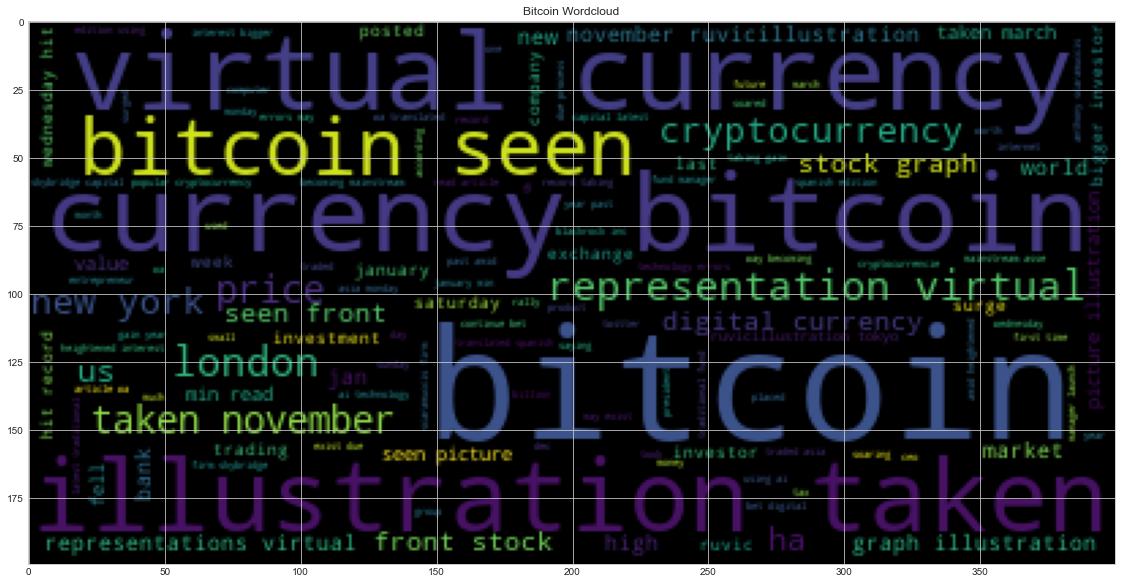

In [333]:
wc = WordCloud().generate(big_string)
plt.imshow(wc)
plt.title("Bitcoin Wordcloud");

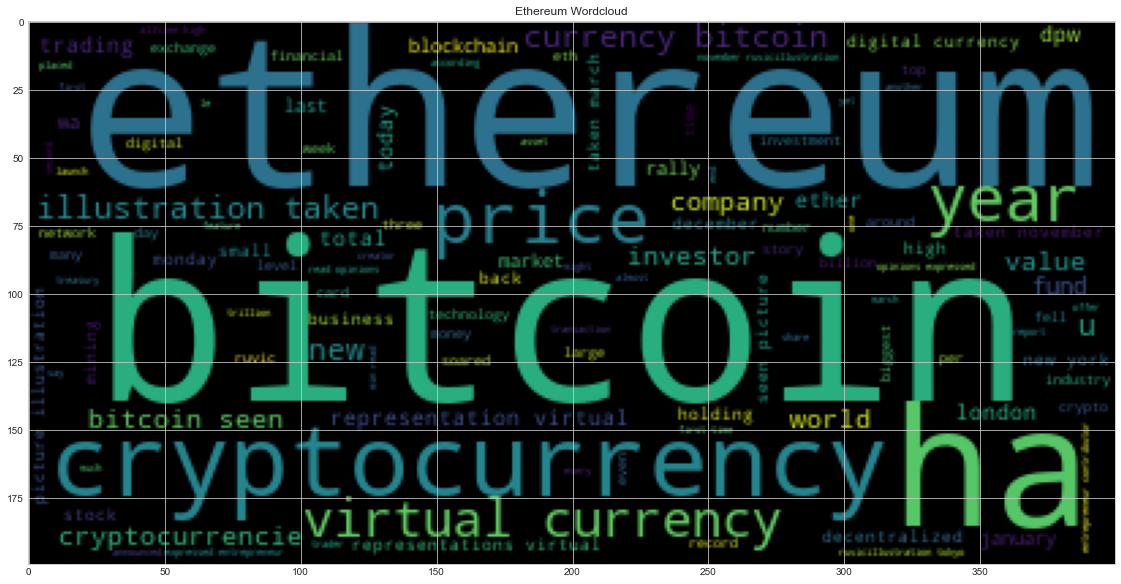

In [334]:
# Generate the Ethereum word cloud
big_string2 = ' '.join(eth_result)
wc = WordCloud().generate(big_string2)
plt.imshow(wc)
plt.title("Ethereum Wordcloud");

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [335]:
import spacy
from spacy import displacy

In [336]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [337]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [368]:
# Concatenate all of the bitcoin text together
bitcoin_string = bitcoin_df['text'].apply(''.join)
bitcoin_string = bitcoin_string.str.cat(sep=' ')

In [373]:
# Run the NER processor on all of the text
# Add a title to the document
# Render the visualization
btc_doc = nlp(bitcoin_string)
btc_doc.user_data["title"] = "Bitcoin NER"
displacy.render(btc_doc, style='ent')



In [371]:
# List all Entities
entities = [ent.text for ent in btc_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(entities)

['India', 'bitcoin', 'the Times of India', 'Bitcoin', 'Bitcoin', 'Twitter', 'Tweets', 'US', 'New York', 'CNN', 'Blockrizes', 'the U.S. Treasury Department', 'bitcoin', 'the popular cryptocurrency exchange', 'Bitcoin', 'Bitcoin', 'Forbes', 'Reuters', 'LONDON', 'Reuters', 'Bitcoin', 'The Verge', 'Twitter and Square', 'Reuters', 'LONDON', 'Reuters', 'Bitcoin', 'Bitcoin', 'Bitcoin', 'LONDON', 'Reuters', 'Bitcoin', 'LONDON', 'Reuters', 'Bitcoin', 'Bitcoin', 'REUTERS/', 'Reuters', 'Bitcoin', 'Reuters', 'Bitcoin', 'REUTERS/Dado Ruvic/Illustration', 'Reuters', 'Bitcoin', 'LONDON', 'Reuters', 'Bitcoin', 'digital', 'bitcoin', 'U.S.', 'Reuters', 'Charlotte', 'North Carolina', 'USA', 'Bank of America Stadium', 'Bitcoin', 'LONDON', 'Reuters', 'Bitcoin', 'LONDON', 'Reuters', 'Reuters', 'REUTERS/Dado Ruvic/Illustration', 'Reuters', 'Bitcoin', 'Reuters', 'REUTERS/Dado Ruvic/Illustration', 'Reuters', 'Bitcoin', 'REUTERS/Dado Ruvic/Illustration', 'Reuters', 'Bitcoin', 'Bitcoin', 'The New York Department

---

## Ethereum NER

In [376]:
# Concatenate all of the ethereum text together
ethereum_string = eth_df['text'].apply(''.join)
ethereum_string = ethereum_string.str.cat(sep=' ')


In [377]:
# Run the NER processor on all of the text
# Add a title to the document
# Render the visualization
eth_doc = nlp(ethereum_string)
eth_doc.user_data["title"] = "Ethereum NER"
displacy.render(eth_doc, style='ent')

In [378]:
# List all Entities
entities = [ent.text for ent in eth_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(entities)

['bitcoin', 'Ethereum', 'Bitcoin', 'Reuters', 'REUTERS/Dado Ruvic/Illustration', 'Reuters', 'Bitcoin', 'Reuters', 'REUTERS/Dado Ruvic/Illustration', 'Reuters', 'Bitcoin', 'Reuters', 'Bitcoin', 'REUTERS', 'SIN', 'Reuters', 'Bitcoin', 'REUTERS', 'SIN', 'Las Vegas', 'Reuters', 'Bitcoin', 'REUTERS/', 'Reuters', 'Ethereum 2.0', 'LONDON', 'Reuters', 'Bitcoin', 'digital', '+1092', 'Reuters', 'U.S.', 'U.S.', 'bitcoin', 'Bitcoin', 'Reuters', 'Bitcoin', 'LONDON', 'Reuters', 'Reuters', 'Bitcoin', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'U.S.', 'REUTERS/', 'Reuters', 'REUTERS/', 'Reuters', 'Bitcoin', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'LONDON', 'Reuters', 'REUTERS/Dado Ruvic/Illustration', 'Reuters', 'Bitcoin', 'bitcoin', 'Bitcoin', 'Reuters', 'REUTERS/Dado Ruvic/Illustration', 'Reuters', 'Yuriko Nakao/Getty Images', 'Bitcoin', 'bitcoin', 'NEW YORK', 'Reuters', 'U.S.', 'U.S.', 'US', 'Reuters', 'Bitcoin', 'Reuters', 'Bitcoin \r\n ', 'Ethereum \r\n ETHUSD', 'Business InsiderThe', 'bit